# FORD GO BIKE DATA ANALYSIS

## Contents


  ### [Introduction](#Introduction)
   
  ### [Preliminary Wrangling](#Wrangling)
   
  ### [Univariate Exploration](#Univariate)
   
  ### [Bivariate Exploration](#Bivariate)
   
  ### [Multivariate Exploration](#Multivariate)
   
  ### [Summary](#Summary)
   
  ### [Reference](#Reference)

## <a name="Introduction"></a> Introduction

In this project, we will be visualizing Ford [GoBike System Data](https://s3.amazonaws.com/fordgobike-data/index.html).This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

The Data includes following : 

    Trip Duration (seconds)
    Start Time and Date
    End Time and Date
    Start Station ID
    Start Station Name
    Start Station Latitude
    Start Station Longitude
    End Station ID
    End Station Name
    End Station Latitude
    End Station Longitude
    Bike ID
    User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
    Bike share for all trip
    Member Year of Birth
    Member Gender


## <a name="Wrangling"></a> Preliminary Wrangling

In [35]:
# import all packages 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
import os
import glob 

%matplotlib inline

### Gathering Data

In [11]:
%%time


# Location where the csv files are stored
path = './Data'
files= glob.glob(os.path.join(path, "*.csv"))

# concatenate the data 
df = pd.concat((pd.read_csv(file, low_memory=False) for file in files), ignore_index = True, sort = True)

df.to_csv('bike_data_final.csv', index=False)


Wall time: 55.5 s


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   bike_id                  int64  
 1   bike_share_for_all_trip  object 
 2   duration_sec             int64  
 3   end_station_id           float64
 4   end_station_latitude     float64
 5   end_station_longitude    float64
 6   end_station_name         object 
 7   end_time                 object 
 8   member_birth_year        float64
 9   member_gender            object 
 10  start_station_id         float64
 11  start_station_latitude   float64
 12  start_station_longitude  float64
 13  start_station_name       object 
 14  start_time               object 
 15  user_type                object 
dtypes: float64(7), int64(2), object(7)
memory usage: 333.8+ MB


In [33]:
%%time

df_bike = pd.read_csv("bike_data_final.csv", encoding = "iso-8859-1", 
                      parse_dates = ['end_time', 'start_time', 'member_birth_year'])

Wall time: 15.6 s


In [36]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   bike_id                  int64         
 1   bike_share_for_all_trip  object        
 2   duration_sec             int64         
 3   end_station_id           float64       
 4   end_station_latitude     float64       
 5   end_station_longitude    float64       
 6   end_station_name         object        
 7   end_time                 datetime64[ns]
 8   member_birth_year        object        
 9   member_gender            object        
 10  start_station_id         float64       
 11  start_station_latitude   float64       
 12  start_station_longitude  float64       
 13  start_station_name       object        
 14  start_time               datetime64[ns]
 15  user_type                object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(6)
memory usage: 333.

In [37]:
df.columns

Index(['bike_id', 'bike_share_for_all_trip', 'duration_sec', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'end_time', 'member_birth_year', 'member_gender', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type'],
      dtype='object')

In [38]:
%%time

#create a dictionary for datatypes to pass into pandas.read_csv() 
types = {'bike_id': 'string', 'bike_share_for_all_trip': 'category', 'duration_sec': np.int32, 'end_station_id': 'string',
       'end_station_latitude': np.float64, 'end_station_longitude': np.float64, 'end_station_name': 'string',
        'member_gender': 'category', 'start_station_id': 'string',
       'start_station_latitude': np.float64, 'start_station_longitude': np.float64,
       'start_station_name': 'string', 'user_type': 'category'}


#Read .csv file using some specifications
df_bike = pd.read_csv("bike_data_final.csv", encoding = "iso-8859-1", 
                      parse_dates = ['end_time', 'start_time'], na_values = np.nan, dtype = types)

Wall time: 47.9 s


In [39]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   bike_id                  string        
 1   bike_share_for_all_trip  category      
 2   duration_sec             int32         
 3   end_station_id           string        
 4   end_station_latitude     float64       
 5   end_station_longitude    float64       
 6   end_station_name         string        
 7   end_time                 datetime64[ns]
 8   member_birth_year        float64       
 9   member_gender            category      
 10  start_station_id         string        
 11  start_station_latitude   float64       
 12  start_station_longitude  float64       
 13  start_station_name       string        
 14  start_time               datetime64[ns]
 15  user_type                category      
dtypes: category(3), datetime64[ns](2), float64(5), int32(1), string(5)
memor

### Assessing Data

In [40]:
df_bikes = pd.read_csv('bike_data_final.csv',low_memory= False)
df_bikes.head(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,2765,No,75284,285.0,37.783521,-122.431158,Webster St at O'Farrell St,2018-02-01 19:47:19.8240,1986.0,Male,120.0,37.761420,-122.426435,Mission Dolores Park,2018-01-31 22:52:35.2390,Subscriber
1,2815,No,85422,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-01 15:57:17.3100,NaN,NaN,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-01-31 16:13:34.3510,Customer
2,3039,No,71576,296.0,37.325998,-121.877120,5th St at Virginia St,2018-02-01 10:16:52.1160,1996.0,Male,304.0,37.348759,-121.894798,Jackson St at 5th St,2018-01-31 14:23:55.8890,Customer
3,321,No,61076,47.0,37.780955,-122.399749,4th St at Harrison St,2018-02-01 07:51:20.5000,NaN,NaN,75.0,37.773793,-122.421239,Market St at Franklin St,2018-01-31 14:53:23.5620,Customer
4,617,No,39966,19.0,37.788975,-122.403452,Post St at Kearny St,2018-02-01 06:58:31.0530,1991.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2018-01-31 19:52:24.6670,Subscriber
5,1306,No,6477,160.0,37.805318,-122.294837,West Oakland BART Station,2018-02-01 00:46:41.9080,NaN,NaN,236.0,37.803686,-122.282497,Market St at 8th St,2018-01-31 22:58:44.8670,Customer
6,3571,No,453,134.0,37.752428,-122.420628,Valencia St at 24th St,2018-02-01 00:01:26.8050,1988.0,Male,110.0,37.763708,-122.415204,17th & Folsom Street Park (17th St at Folsom St),2018-01-31 23:53:53.6320,Subscriber
7,1403,No,180,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-01-31 23:55:10.8070,1980.0,Male,81.0,37.775880,-122.393170,Berry St at 4th St,2018-01-31 23:52:09.9030,Subscriber
8,3675,Yes,996,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2018-01-31 23:51:32.6740,1987.0,Male,134.0,37.752428,-122.420628,Valencia St at 24th St,2018-01-31 23:34:56.0040,Subscriber
9,1453,Yes,825,317.0,37.333955,-121.877349,San Salvador St at 9th St,2018-01-31 23:47:59.8090,1994.0,Female,305.0,37.342725,-121.895617,Ryland Park,2018-01-31 23:34:14.0270,Subscriber


In [41]:
# Get data rows x columns
df_bikes.shape

(2734625, 16)

In [42]:
# Get information abt data
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   bike_id                  int64  
 1   bike_share_for_all_trip  object 
 2   duration_sec             int64  
 3   end_station_id           float64
 4   end_station_latitude     float64
 5   end_station_longitude    float64
 6   end_station_name         object 
 7   end_time                 object 
 8   member_birth_year        float64
 9   member_gender            object 
 10  start_station_id         float64
 11  start_station_latitude   float64
 12  start_station_longitude  float64
 13  start_station_name       object 
 14  start_time               object 
 15  user_type                object 
dtypes: float64(7), int64(2), object(7)
memory usage: 333.8+ MB


In [43]:
# Get null data in each column
df_bikes.isnull().sum()

bike_id                         0
bike_share_for_all_trip         0
duration_sec                    0
end_station_id              12501
end_station_latitude            0
end_station_longitude           0
end_station_name            12501
end_time                        0
member_birth_year          151625
member_gender              151271
start_station_id            12501
start_station_latitude          0
start_station_longitude         0
start_station_name          12501
start_time                      0
user_type                       0
dtype: int64

In [44]:
df_bikes.member_gender.value_counts()

Male      1902810
Female     637069
Other       43475
Name: member_gender, dtype: int64

In [45]:
df_bikes.user_type.value_counts()

Subscriber    2338350
Customer       396275
Name: user_type, dtype: int64

In [46]:
df_bikes.bike_share_for_all_trip.value_counts()

No     2495879
Yes     238746
Name: bike_share_for_all_trip, dtype: int64

In [47]:
df_bikes.member_birth_year.value_counts()

1988.0    151210
1989.0    129011
1987.0    126198
1990.0    124272
1993.0    120640
           ...  
1906.0         2
1930.0         2
1903.0         1
1886.0         1
1910.0         1
Name: member_birth_year, Length: 92, dtype: int64

In [48]:
df_bikes.query('member_birth_year < 1900')['member_birth_year'].count()

74

### Quality Issues

   - String datatype for start_time and end_time instead datetime
   - member_gender should be categorical data type insted of str
   - member_gender should have only Male and Female category and others are invalid
   - user_type should be categorical data type instead of str
   - bike_share_for_all_trip should be categorical instead of str
   - member_birth_year has data < 1900 causing age > 100 years
   
   - Add new column for age
   - Add a new column for age_group
   - Add new column for trip day of the week and trip month of year

### Clean Data

In [49]:
# Creating copy of data for cleaning
df_bikes_clean = df_bikes.copy()

### Quality issue 1 : Data inconsistency in year

**Define** In member_birth_year, birth_year should be greater than 1920 as people with age > 100 can be removed.

In [50]:
df_bikes_clean = df_bikes[df_bikes.member_birth_year > 1920]

**Test**

In [51]:
df_bikes_clean.query('member_birth_year <= 1920')['member_birth_year'].count()

0

### Quality issue 2: New columns for age , age group ,day of week and month of year

**Define** Create age column for the member and remove records with age <70 and group into age

In [52]:
df_bikes_clean['age'] = pd.Timestamp('now').year - df_bikes_clean['member_birth_year']
df_bikes_clean['age'] = df_bikes_clean['age'].astype(int)

df_bikes_clean = df_bikes_clean[df_bikes_clean['age'] <=70]


<ipython-input-52-9829f7678ecb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikes_clean['age'] = pd.Timestamp('now').year - df_bikes_clean['member_birth_year']
<ipython-input-52-9829f7678ecb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bikes_clean['age'] = df_bikes_clean['age'].astype(int)


In [56]:
df_bikes_clean.loc[:,'age'] = pd.Timestamp('now').year - df_bikes_clean['member_birth_year']
df_bikes_clean.loc[:,'age'] = df_bikes_clean['age'].astype(int)

df_bikes_clean = df_bikes_clean[df_bikes_clean['age'] <=70]


In [58]:
!pip install swifter

#Generate a new field for member age group from member_age_bin
df_bikes_clean['age_group'] = df_bikes_clean['age'].swifter.apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20 < x <= 30
                                                  else '30 - 40' if 30 < x <= 40
                                                  else '40 - 50' if 40 < x <= 50
                                                  else '50 - 60' if 50 < x <= 60
                                                  else '60 - 70' if 60 < x <= 70
                                                  else x)
df_bikes_clean.age_group = df_bikes_clean.age_group.astype('category')

^C


In [16]:


#Generate a new field for member age group from member_age_bin
df_bikes_clean['age_group'] = df_bikes_clean['age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20 < x <= 30
                                                  else '30 - 40' if 30 < x <= 40
                                                  else '40 - 50' if 40 < x <= 50
                                                  else '50 - 60' if 50 < x <= 60
                                                  else '60 - 70' if 60 < x <= 70
                                                  else x)
df_bikes_clean.age_group = df_bikes_clean.age_group.astype('category')


**Test**

In [17]:
df_bikes_clean.sample(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,age,age_group
1097773,2589,NaN,664,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2017-08-17 17:23:04.7200,1984.0,Male,48.0,37.782411,-122.392706,2nd St at S Park St,2017-08-17 17:12:00.4130,Subscriber,36,30 - 40
2176284,5065,No,560,321.0,37.780146,-122.403071,5th St at Folsom,2019-01-12 10:52:56.1890,1969.0,Male,100.0,37.767100,-122.410662,Bryant St at 15th St,2019-01-12 10:43:35.8030,Subscriber,51,50 - 60
390856,6833,No,912,81.0,37.775880,-122.393170,Berry St at 4th St,2019-04-10 08:40:21.3370,1973.0,Female,84.0,37.769200,-122.433812,Duboce Park,2019-04-10 08:25:08.9360,Customer,47,40 - 50
1536901,3743,No,1338,17.0,37.792251,-122.397086,Embarcadero BART Station (Beale St at Market St),2019-03-14 09:45:08.6940,1990.0,Male,52.0,37.777416,-122.441838,McAllister St at Baker St,2019-03-14 09:22:50.3610,Customer,30,20 - 30
1407733,5852,No,2453,74.0,37.776435,-122.426244,Laguna St at Hayes St,2019-03-28 18:37:25.1510,1974.0,Male,55.0,37.777053,-122.429558,Webster St at Grove St,2019-03-28 17:56:31.5870,Subscriber,46,40 - 50
1987801,2148,No,1149,115.0,37.765026,-122.398773,Jackson Playground,2018-01-21 00:56:06.6870,1989.0,Male,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-01-21 00:36:57.1900,Subscriber,31,30 - 40
1696720,3783,No,479,8.0,37.799953,-122.398525,The Embarcadero at Vallejo St,2018-05-21 18:47:33.8850,1984.0,Female,21.0,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2018-05-21 18:39:34.4810,Subscriber,36,30 - 40
2115357,123,No,1358,104.0,37.767045,-122.390833,4th St at 16th St,2019-01-23 11:27:19.6230,1977.0,Female,362.0,37.731727,-122.390056,Lane St at Revere Ave,2019-01-23 11:04:40.6530,Subscriber,43,40 - 50
1593768,5592,No,752,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2019-03-07 14:43:41.5370,1963.0,Male,49.0,37.780760,-122.394989,S Park St at 3rd St,2019-03-07 14:31:09.0160,Subscriber,57,50 - 60
1053868,2145,NaN,214,212.0,37.824931,-122.260479,Mosswood Park,2017-09-01 16:37:54.4690,1980.0,Other,176.0,37.828410,-122.266315,MacArthur BART Station,2017-09-01 16:34:20.2230,Subscriber,40,30 - 40


In [18]:
df_bikes_clean.age.value_counts()

32    174820
33    148691
31    148213
30    141104
35    136066
29    134661
27    134034
34    132740
36    123118
28    120616
37    113100
26    108996
38    107987
25     92363
39     86347
40     86143
41     68333
43     63913
42     61940
24     61326
45     56721
44     49881
46     49662
47     44522
23     44137
52     42074
49     41946
48     37839
55     36694
50     34946
22     34944
51     32124
53     29508
57     25847
21     25183
56     22946
58     21641
54     21466
59     19143
60     15985
61     14574
62     13612
20     12543
63     10820
64      9751
66      7531
68      5095
65      4799
70      3547
67      3288
69      3201
19       267
Name: age, dtype: int64

### Quality issue 3:  Wrong data type

**Define** : Change datatypes for start_time, end_time, member_gender, user_type, bike_share_for_all_trip.

member_gender should have only Male and Female, Others are marked as None

In [19]:
# Fixing data type for start_time and end_time
df_bikes_clean.start_time = pd.to_datetime(df_bikes_clean['start_time'],format="%Y-%m-%d %H:%M:%S.%f")
df_bikes_clean.end_time = pd.to_datetime(df_bikes_clean['end_time'],format="%Y-%m-%d %H:%M:%S.%f")

# Updating invalid gender types as None
df_bikes_clean.loc[(df_bikes_clean.member_gender == 'Other'), 'member_gender'] = None 

# Changing data type for member_gender, user_type, bike_share_for_all_trip to category
df_bikes_clean.member_gender = df_bikes_clean.member_gender.astype('category')
df_bikes_clean.user_type = df_bikes_clean.user_type.astype('category')
df_bikes_clean.bike_share_for_all_trip = df_bikes_clean.bike_share_for_all_trip.astype('category')


**Test**

In [20]:
df_bikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020748 entries, 0 to 3254324
Data columns (total 18 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
age                        int64
age_group                  category
dtypes: category(4), datetime64[ns](2), float64(7), int64(3), object(2)
memory usage: 357.2+ MB


In [21]:
df_bikes_clean.member_gender.value_counts()

Male      2238206
Female     733418
Name: member_gender, dtype: int64

**Define** Extract and create day of week , month of year and hour of the day from start time

In [22]:
# Extract month from start time
df_bikes_clean['trip_month'] = df_bikes_clean['start_time'].dt.strftime('%B')

# Extract day of week from start time
df_bikes_clean['trip_weekday'] = df_bikes_clean['start_time'].dt.strftime('%a')

# Extract month-year from start time
df_bikes_clean['year_month']=df_bikes_clean['start_time'].map(lambda x: x.strftime('%Y-%m'))

# Extract start time hour
df_bikes_clean['start_hour']=df_bikes_clean['start_time'].dt.hour

**Test**

In [23]:
df_bikes_clean.sample(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_longitude,start_station_name,start_time,user_type,age,age_group,trip_month,trip_weekday,year_month,start_hour
3241502,1855,No,832,313.0,37.331415,-121.893200,Almaden Blvd at San Fernando St,2019-02-04 08:10:19.752,1993.0,Female,...,-121.888889,Julian St at 6th St,2019-02-04 07:56:26.896,Subscriber,27,20 - 30,February,Mon,2019-02,7
2366899,1223,No,398,181.0,37.811377,-122.265192,Grand Ave at Webster St,2018-07-12 08:44:41.537,1979.0,Male,...,-122.249680,El Embarcadero at Grand Ave,2018-07-12 08:38:02.648,Subscriber,41,40 - 50,July,Thu,2018-07,8
438342,4984,No,653,130.0,37.757288,-122.392051,22nd St Caltrain Station,2019-04-05 07:32:47.268,1986.0,Male,...,-122.420219,Valencia St at Cesar Chavez St,2019-04-05 07:21:53.581,Customer,34,30 - 40,April,Fri,2019-04,7
1850786,5012,No,1070,11.0,37.797280,-122.398436,Davis St at Jackson St,2018-12-20 14:55:18.041,1992.0,Male,...,-122.421866,Valencia St at 16th St,2018-12-20 14:37:27.971,Subscriber,28,20 - 30,December,Thu,2018-12,14
607637,126,No,215,294.0,37.327581,-121.884559,Pierce Ave at Market St,2018-09-11 12:58:49.253,1982.0,Male,...,-121.877120,5th St at Virginia St,2018-09-11 12:55:13.876,Subscriber,38,30 - 40,September,Tue,2018-09,12
1827286,4813,No,1125,8.0,37.799953,-122.398525,The Embarcadero at Vallejo St,2018-12-28 15:47:48.671,1996.0,Male,...,-122.400811,Montgomery St BART Station (Market St at 2nd St),2018-12-28 15:29:03.510,Customer,24,20 - 30,December,Fri,2018-12,15
560457,70,Yes,1112,357.0,37.341132,-121.892844,2nd St at Julian St,2018-09-18 16:42:12.402,1989.0,Male,...,-121.881766,5th St at San Salvador St,2018-09-18 16:23:39.933,Subscriber,31,30 - 40,September,Tue,2018-09,16
1899932,4436,No,245,50.0,37.780526,-122.390288,2nd St at Townsend St,2018-12-11 17:49:37.704,1965.0,Male,...,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2018-12-11 17:45:32.282,Subscriber,55,50 - 60,December,Tue,2018-12,17
692154,3688,NaN,1012,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-18 17:14:08.173,1969.0,Male,...,-122.403234,The Embarcadero at Sansome St,2017-12-18 16:57:15.623,Subscriber,51,50 - 60,December,Mon,2017-12,16
1153129,2353,NaN,376,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2017-07-24 17:26:14.011,1991.0,Male,...,-122.394643,Howard St at Beale St,2017-07-24 17:19:57.789,Subscriber,29,20 - 30,July,Mon,2017-07,17


## What is the structure of the dataset ?

Dataset has around 3M + bike rides over a span of 2017, 2018 and 2019 with features like bike_id, member_age, member_gender,start_time, end_time, user_type, duration_sec etc.

## What are the main features of interest in your dataset?¶


    - What is the average duration of a trip
    - How trip duration varies on day of the week and month of the year
    - Does user_type, gender and age has any effects on trip duration
    

## What features in the dataset do you think will help support your investigation into your features of interest?¶


Gender, age group, day of the week, user type and trip duration

## <a name="Univariate"></a> Univariate Exploration 

> In univariate exploration, individual variables distribution is analysed.

**user_type distribution**

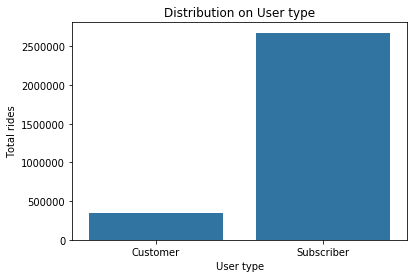

In [24]:
fig = plt.figure()
base_color = sb.color_palette()[0]
_ = sb.countplot(data = df_bikes_clean, x = 'user_type', color = base_color)

plt.xlabel('User type');
plt.ylabel('Total rides');
plt.title('Distribution on User type');

 > The distribution clearly shows majority of bike ride users are subscribers.

**member_gender distribution**

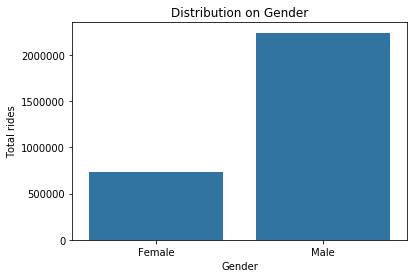

In [25]:
fig = plt.figure()
base_color = sb.color_palette()[0]
_ = sb.countplot(data = df_bikes_clean, x = 'member_gender', color = base_color)

plt.xlabel('Gender');
plt.ylabel('Total rides');
plt.title('Distribution on Gender');

> The distribution clearly shows majority of bike ride users are Male.

**bike_share_for_all_trip distribution**

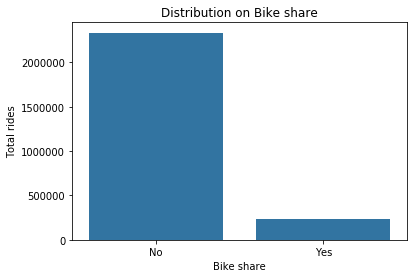

In [26]:
fig = plt.figure()
base_color = sb.color_palette()[0]
_ = sb.countplot(data = df_bikes_clean, x = 'bike_share_for_all_trip', color = base_color)

plt.xlabel('Bike share');
plt.ylabel('Total rides');
plt.title('Distribution on Bike share');


> People use Ford goBikes for part of the trip. They rarely use bike share

**Age distribution**

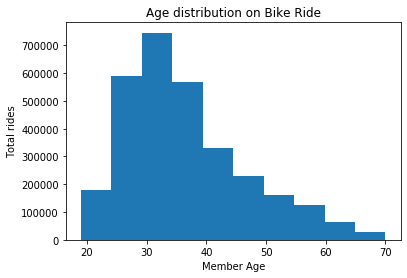

In [27]:
fig = plt.figure()
base_color = sb.color_palette()[0]
plt.hist(data = df_bikes_clean, x = 'age');
plt.xlabel('Member Age');
plt.ylabel('Total rides');
plt.title('Age distribution on Bike Ride');

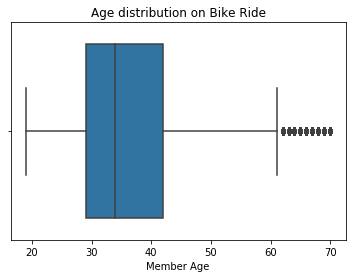

In [28]:
fig = plt.figure()
base_color = sb.color_palette()[0]
_ = sb.boxplot(data = df_bikes_clean, x = 'age', color = base_color);
plt.xlabel('Member Age');
plt.title('Age distribution on Bike Ride');

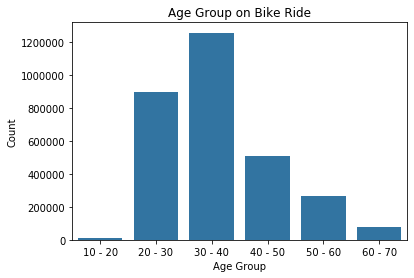

In [29]:
fig = plt.figure()
base_color = sb.color_palette()[0]
_ = sb.countplot(data = df_bikes_clean, x = 'age_group', color = base_color);
plt.xlabel('Age Group');
plt.ylabel('Count')
plt.title('Age Group on Bike Ride');

> Distribution clearly shows major subscribers belong to age group 30 -40

**Trip duration distribution**

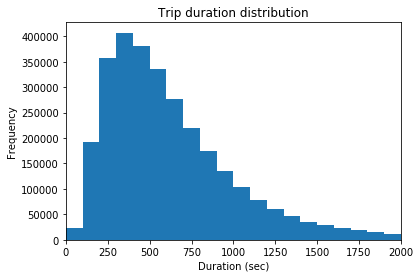

In [30]:
bins_edge = np.arange(0, df_bikes_clean.duration_sec.max()+100, 100)

plt.hist(data=df_bikes_clean, x='duration_sec', bins=bins_edge)
plt.xlim(0, 2000)
plt.xlabel('Duration (sec)');
plt.ylabel('Frequency');
plt.title('Trip duration distribution');

> Distribution is skewed right and clearly shows most of the trips have duration of 300 - 700 seconds.

**Distribution by start hour**

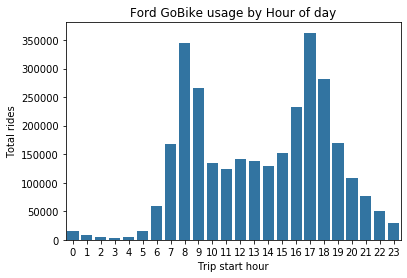

In [31]:
fig = plt.figure()
base_color = sb.color_palette()[0]
sb.countplot(data=df_bikes_clean, x='start_hour',color=base_color);
plt.xlabel('Trip start hour');
plt.ylabel('Total rides');
plt.title('Ford GoBike usage by Hour of day');

> Distribution indicates 8- 9 AM and 5-6 PM is the peak hours for the ride.

**Distribution on Day of Week usage**

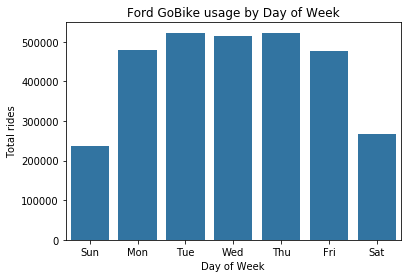

In [32]:
fig = plt.figure()
base_color = sb.color_palette()[0]
day_order = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
sb.countplot(data=df_bikes_clean, x='trip_weekday',order = day_order,color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Total rides');
plt.title('Ford GoBike usage by Day of Week');

> Distribution clearly indicates weekdays have more rides than weekends. Also ride usage is more towards the middle of week.

**Distribution on month_year usage**

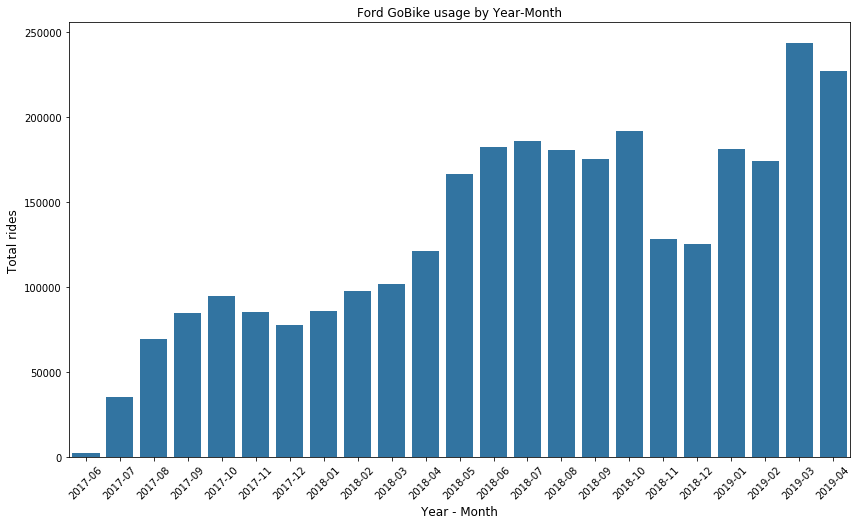

In [33]:
fig = plt.figure(figsize=(14,8))
base_color = sb.color_palette()[0]
sb.countplot(data=df_bikes_clean.sort_values(by='year_month'), x='year_month',color = base_color);
plt.xlabel('Year - Month',fontsize = 12);
plt.ylabel('Total rides', fontsize = 12);
plt.title('Ford GoBike usage by Year-Month');
plt.xticks(rotation=45);

> Distribution shows an upward trend in usage of Ford GoBike and adoption rate has increased from 2017 - 2019.

**Distribution on monthly usage**

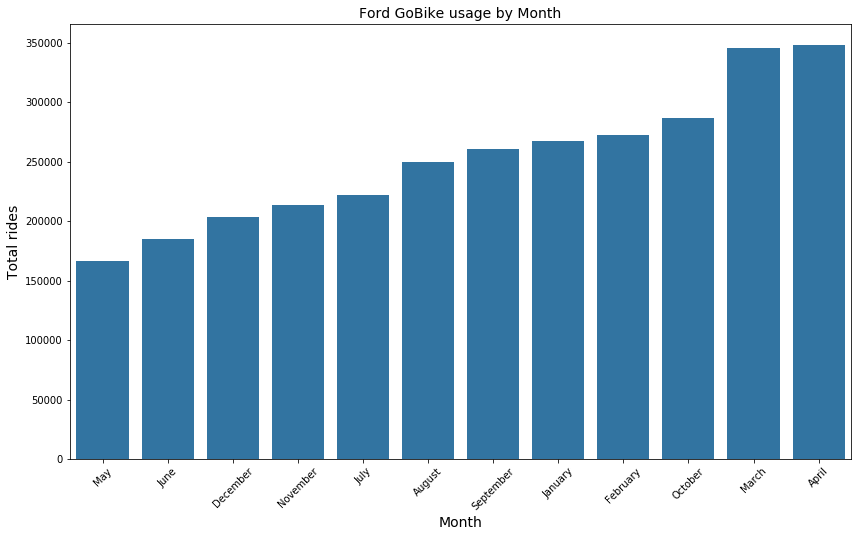

In [34]:

fig = plt.figure(figsize=(14,8))
base_color = sb.color_palette()[0]
order = reversed(df_bikes_clean['trip_month'].value_counts().index)

sb.countplot(data = df_bikes_clean, x = 'trip_month',color = base_color,order = order);
plt.xlabel('Month',fontsize = 14);
plt.ylabel('Total rides', fontsize = 14);
plt.title('Ford GoBike usage by Month',fontsize = 14);
plt.xticks(rotation=45);

> Distribution shows the usage is more during March - April

## <a name="Bivrariate"></a> Bivariate Exploration

> In this section , relationships between pairs of variables are analysed.

In [35]:
df_bikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020748 entries, 0 to 3254324
Data columns (total 22 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
age                        int64
age_group                  category
trip_month                 object
trip_weekday               object
year_month                 object
start_hour                 int64
dtypes: category(4), datetime64[ns](2), float64(7), int64(4), object(5)
memory usage: 449.4+ MB


In [36]:
df_bikes_clean['trip_month'] = df_bikes_clean['trip_month'].astype('category')
df_bikes_clean['trip_weekday'] = df_bikes_clean['trip_weekday'].astype('category')
df_bikes_clean['year_month']=df_bikes_clean['year_month'].astype('category')
df_bikes_clean['start_hour']=df_bikes_clean['start_hour'].astype('category')

In [37]:
df_bikes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020748 entries, 0 to 3254324
Data columns (total 22 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
age                        int64
age_group                  category
trip_month                 category
trip_weekday               category
year_month                 category
start_hour                 category
dtypes: category(8), datetime64[ns](2), float64(7), int64(3), object(2)
memory usage: 368.7+ MB


> Lets analyse the impact of categorical variables - bike_share_for_all_trip, member_gender, age_group, user_type, trip_month, trip_weekday and start_hour on **duration_sec**

In [38]:
#Plotting bike_share_for_all_trip vs duration _sec

def plots(x_value, x_label):
    plt.figure(figsize = [8, 6])
    base_color = sb.color_palette()[0]
    sb.boxplot(data = df_bikes_clean, x = x_value, y = 'duration_sec', color = base_color)
    plt.ylim(0, 2000);
    plt.xlabel(x_label,fontsize = 12);
    plt.ylabel('Total Duration (sec)', fontsize = 14);
    plt.title(x_label +' vs duration (sec)',fontsize = 14);
    plt.xticks(rotation=45)

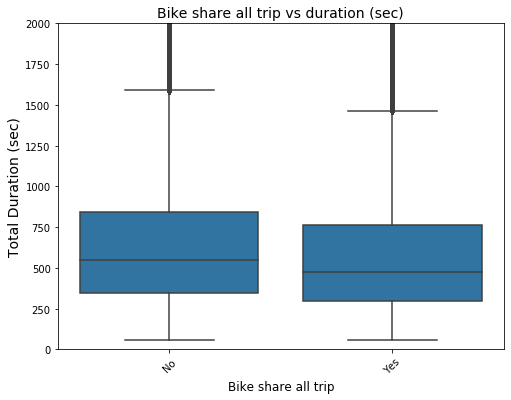

In [39]:

plots('bike_share_for_all_trip','Bike share all trip')

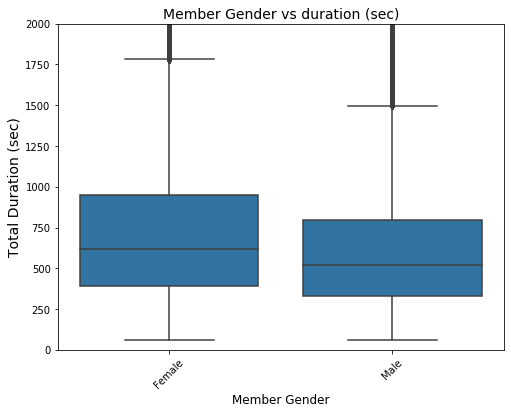

In [40]:
plots('member_gender','Member Gender')

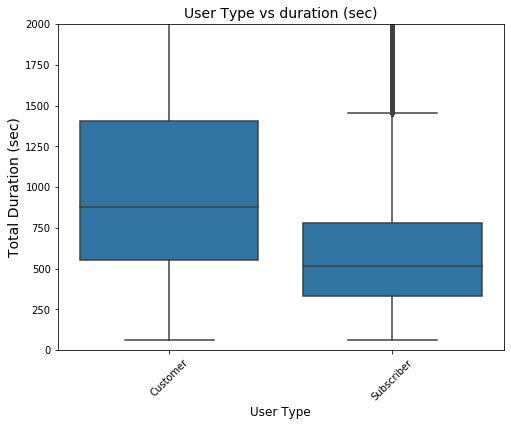

In [41]:
plots('user_type','User Type')

> Customers tends to ride more time compared to subscribers

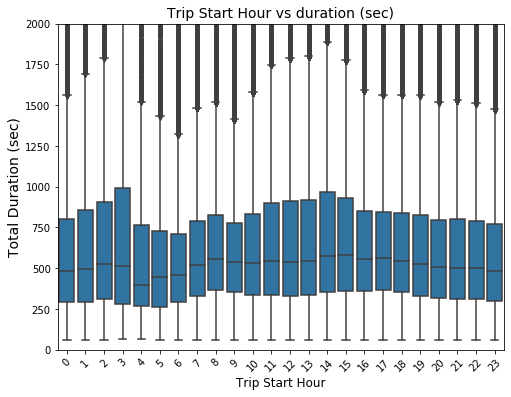

In [42]:
plots('start_hour', 'Trip Start Hour')


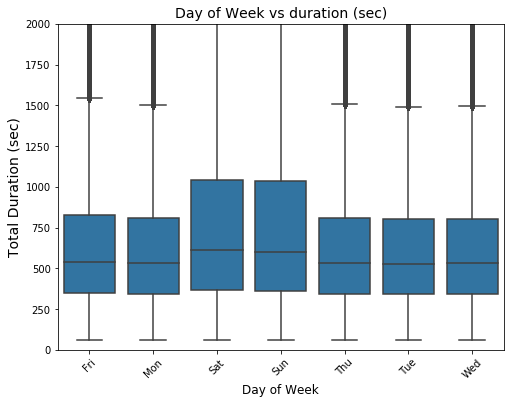

In [43]:
plots('trip_weekday', 'Day of Week')

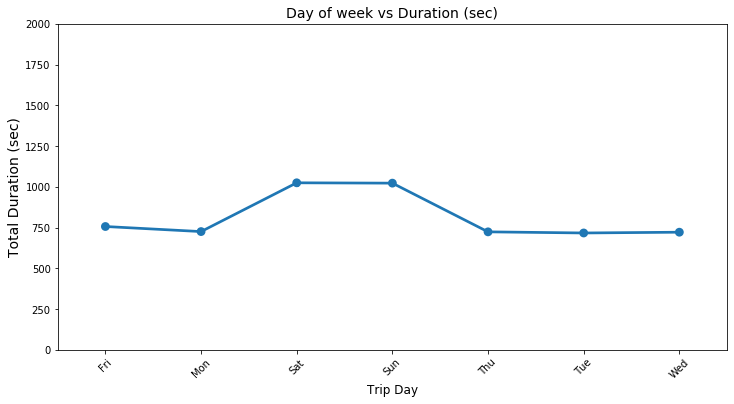

In [44]:
plt.figure(figsize = [12, 6]);
sb.pointplot(x="trip_weekday", y="duration_sec",data=df_bikes_clean);
plt.ylim(0, 2000);
plt.xlabel('Trip Day',fontsize = 12);
plt.ylabel('Total Duration (sec)', fontsize = 14);
plt.title('Day of week vs Duration (sec)',fontsize = 14);
plt.xticks(rotation=45);

> Distribution shows trip duration tend to be more during weekends compared to weekdays.

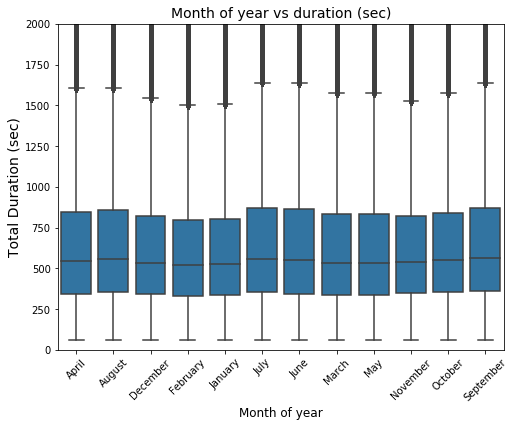

In [45]:
plots('trip_month','Month of year')

> Duration of trips looks same for all the months

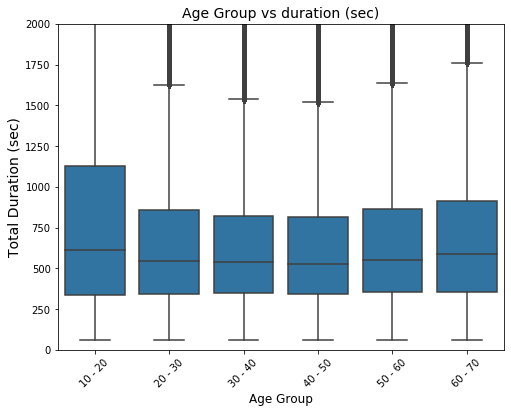

In [46]:
plots('age_group','Age Group')

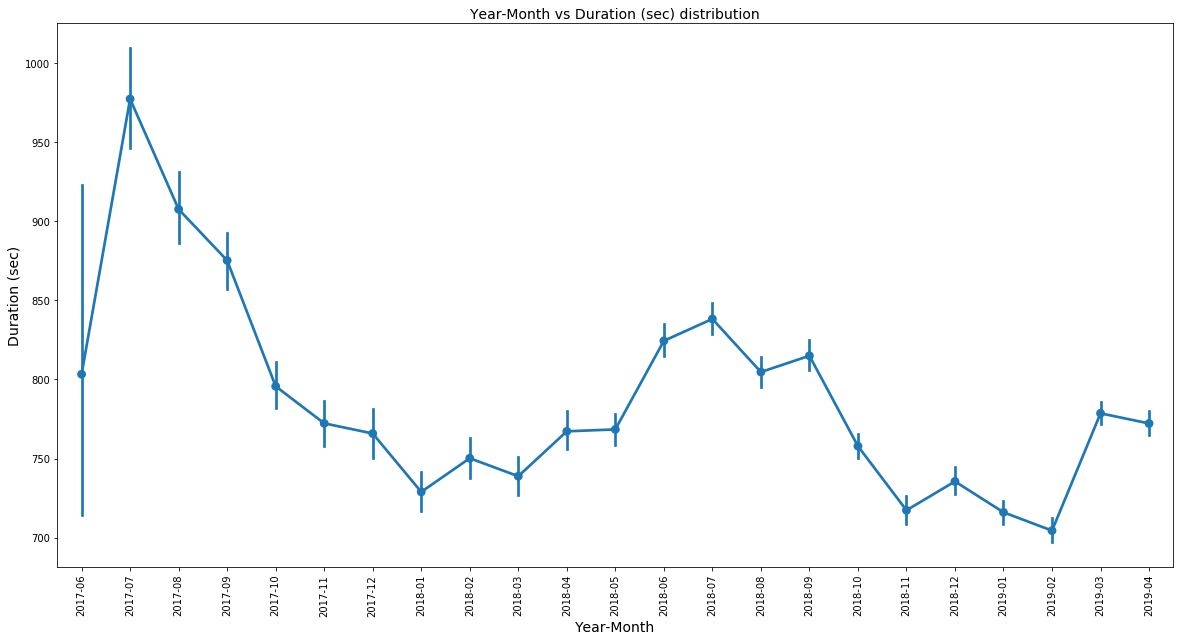

In [47]:
plt.figure(figsize = [20, 10]);
base_color = sb.color_palette()[0]
sb.pointplot(x="year_month", y="duration_sec",data=df_bikes_clean,color=base_color);
plt.xticks(rotation = 90);
plt.xlabel("Year-Month",fontsize = 14);
plt.ylabel("Duration (sec)",fontsize = 14);
plt.title("Year-Month vs Duration (sec) distribution",fontsize = 14);

> Distribution shows there was high duration trip during 2017 and later got reduced.Ford Go bikes was introduced in June 2017 so the initial times, the duration of trips were more which got reduced later.

In [48]:
df_bikes_clean['start_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    63712
Market St at 10th St                                         60665
San Francisco Ferry Building (Harry Bridges Plaza)           57358
San Francisco Caltrain (Townsend St at 4th St)               56836
Berry St at 4th St                                           55371
                                                             ...  
Sonora Ave at 1st St                                            14
Auzerais Ave at Los Gatos Creek Trail                           10
17th St at Santa Clara St                                        8
Delmas Ave at Virginia St                                        5
SF Test Station                                                  1
Name: start_station_name, Length: 393, dtype: int64

Text(0.5, 1.0, 'Station vs Duration (sec) distribution')

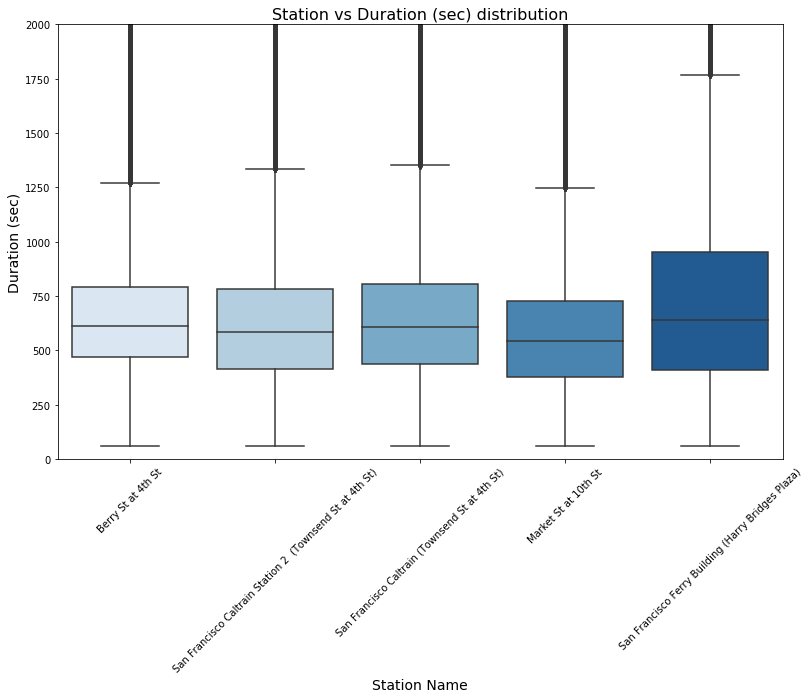

In [70]:
top_station = df_bikes_clean['start_station_name'].value_counts().index[:5]
df_station = df_bikes_clean.loc[df_bikes_clean['start_station_name'].isin(top_station)]

plt.figure(figsize = [13, 8])

sb.boxplot(data = df_station, x = 'start_station_name', y = 'duration_sec',palette='Blues')
plt.ylim(0, 2000);
plt.xticks(rotation = 45);
plt.xlabel("Station Name",fontsize = 14);
plt.ylabel("Duration (sec)",fontsize = 14);
plt.title("Station vs Duration (sec) distribution",fontsize = 16)

> From top 5 stations where users having maximum start trip registered, we can see that San Francisco Ferry Building has trips having maximum duration recordered with an average of 650 seconds

## <a name="Multivariate"></a>Multivariate Exploration

> In this section we create plots of three or more variables to analyse data. We will analyse how age_group, weekdays and duration_sec relationship.

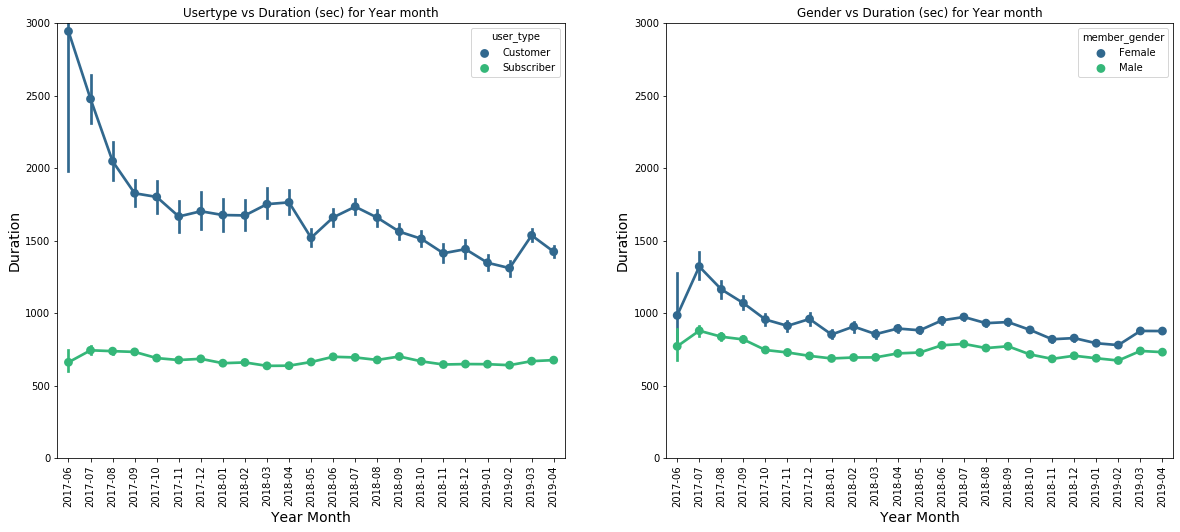

In [50]:
plt.figure(figsize=[20, 8])

plt.subplot(1, 2, 1)
sb.pointplot(data=df_bikes_clean, x='year_month', y='duration_sec', hue='user_type', palette= 'viridis')
plt.xticks(rotation=90);
plt.ylim(0, 3000);
plt.xlabel('Year Month',fontsize = 14);
plt.title('Usertype vs Duration (sec) for Year month');
plt.ylabel('Duration',fontsize = 14);

plt.subplot(1, 2, 2)
sb.pointplot(data=df_bikes_clean, x='year_month', y='duration_sec', hue='member_gender', palette='viridis')
plt.xticks(rotation=90);
plt.ylim(0, 3000);
plt.xlabel('Year Month',fontsize = 14);
plt.ylabel('Duration',fontsize = 14);
plt.title('Gender vs Duration (sec) for Year month');


> From distribution , it shows duration is consistent across subscribers while customers had 
a higher trip duration during early 2017 which gradually declined. Ford gobikes was launched in 2017 June 
and initial promotions/ offers may be the reason for lengthy duration for customers.

> From Gender distribution against duration_sec over the years shows Females ride longer duration over males.

<Figure size 2160x1872 with 0 Axes>

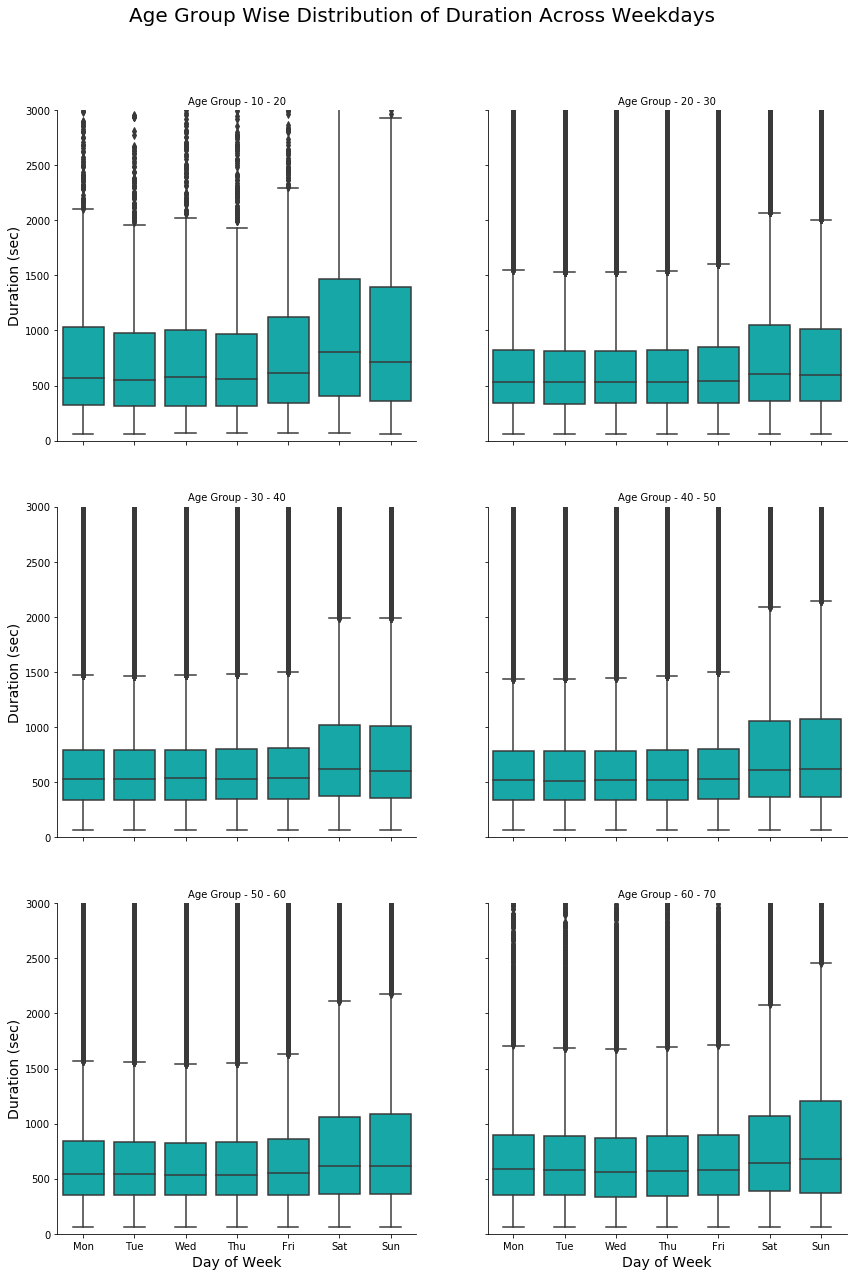

In [68]:
plt.figure(figsize = [30, 26]);
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

g = sb.FacetGrid(data = df_bikes_clean, col = 'age_group',col_wrap = 2,height = 6, aspect= 1,margin_titles=True);
g.map(sb.boxplot, 'trip_weekday', 'duration_sec',order = day_order,color='c')

g.fig.subplots_adjust(wspace=.2, hspace=.2);
g.fig.subplots_adjust(top=.9);

g.set_titles(col_template = "Age Group - {col_name}", fontsize = 16);
g.fig.suptitle('Age Group Wise Distribution of Duration Across Weekdays ',fontsize = 20);
g.set_xlabels('Day of Week',fontsize = 14);
g.set_ylabels('Duration (sec)',fontsize = 14);
plt.ylim(0,3000);
plt.show();

In [69]:
## Saving the data
df_bikes_clean.to_csv('ford_bike_data_master.csv', index = False)


## <a name="Summary"></a>Summary

Based on the analysis of GoBike data for the years 2017 - 2019 following are the conclusions

    - Male gender use with more frequency, but female gender has a higher duration than the male.
    - The top 3 stations to start a trip with higher duration in order are:
        1. San Francisco Ferry Building (Harry Bridges Plaza)
        2. San Francisco Caltrain Station 2 (Townsend St at 4th St)
        3. Market St at 10th St. 
        
    - Subscriber use with more frequency, but the customer has a higher duration than the subscribers in 
      all months.
    - Weekends duration of ride is more though number of people availing ride is less compared to weekday.
    - Older age group tend to use ride during non-peak hours.
    - Average duration of trip is around 500seconds with maximum rentals between 7 -9 AM and 5-7 PM.


## <a name="Reference"></a>Reference

* https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
* https://matplotlib.org/tutorials/
* https://seaborn.pydata.org/
* https://seaborn.pydata.org/tutorial.html
* https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
* https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
* https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
* https://datascienceplus.com/seaborn-categorical-plots-in-python/
* https://julienbeaulieu.gitbook.io/wiki/sciences/programming/data-analysis/data-visualization/data-viz-cheat-sheet